In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

In [86]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(184,184),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [87]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(184,184),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [88]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [89]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## **MODEL CREATION**

In [90]:
from tensorflow.keras.models import Sequential

In [91]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [92]:
model=Sequential()

# **ADD LAYERS**
## a)Convolution Layer

In [94]:
model.add(Convolution2D(32,(3,3),kernel_initializer="random_uniform",activation="relu",strides=(1,1),input_shape=(184,184,3)))

### b)Maxpooling layer

In [95]:
model.add(MaxPooling2D(pool_size=(2,2)))

## c)Flatten

In [96]:
model.add(Flatten())

## d)Dense(Hidden Layer)

In [97]:
model.add(Dense(300,activation="relu"))

## Output Layer

In [101]:
model.add(Dense(5,activation="softmax"))

# **Compile the model**

In [117]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

## Fit the model

In [ ]:
model.fit(xtrain,epochs=5,steps_per_epoch=len(xtrain),validation_data=x_test,validation_steps=len(x_test))

# **Sava model**

In [104]:
model.save("Flowers.h5")

## Test Model

In [105]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [106]:
model=load_model("Flowers.h5")


In [107]:
img=image.load_img('/content/flowers/rose/8775267816_726ddc6d92_n.jpg',target_size=(184,184))

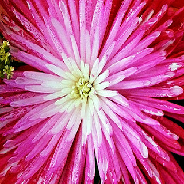

In [108]:
img

In [110]:
x=image.img_to_array(img)

In [111]:
x=np.expand_dims(x,axis=0)

In [114]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [120]:
index[2]

'rose'